***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [2]:
dados = pd.read_csv('dados/dados.csv',sep = ',')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Visualize o conteúdo do DataFrame

In [3]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [4]:
x=788
maximo = dados['Renda'].max()
classes = [0,1576, 3940, 11820, 19700, 200000]
print(maximo,classes)

200000 [0, 1576, 3940, 11820, 19700, 200000]


### 2º Definir os labels das classes

In [5]:
labels = ['E','D','C','B','A']
len(labels)

5

### 3º Construir a coluna de frequências

In [6]:
col_freq = pd.value_counts(pd.cut(x = dados['Renda'], bins = classes,labels = labels, include_lowest=True),ascending=True)
col_freq

A      420
B      822
C     7241
D    18602
E    49755
Name: Renda, dtype: int64

### 4º Construir a coluna de percentuais

In [7]:
col_perc = pd.value_counts(pd.cut(x = dados['Renda'], bins = classes,labels = labels, include_lowest=True),normalize = True,ascending=True)*100
col_perc

A     0.546590
B     1.069755
C     9.423477
D    24.208745
E    64.751432
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [8]:
tabela = pd.concat([col_freq,col_perc],axis = 'columns')
tabela.set_axis(['Renda', 'Percentual'], axis=1, inplace=True)
tabela

,Renda,Percentual
A,420,0.546590
B,822,1.069755
C,7241,9.423477
D,18602,24.208745
E,49755,64.751432


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

<AxesSubplot:>

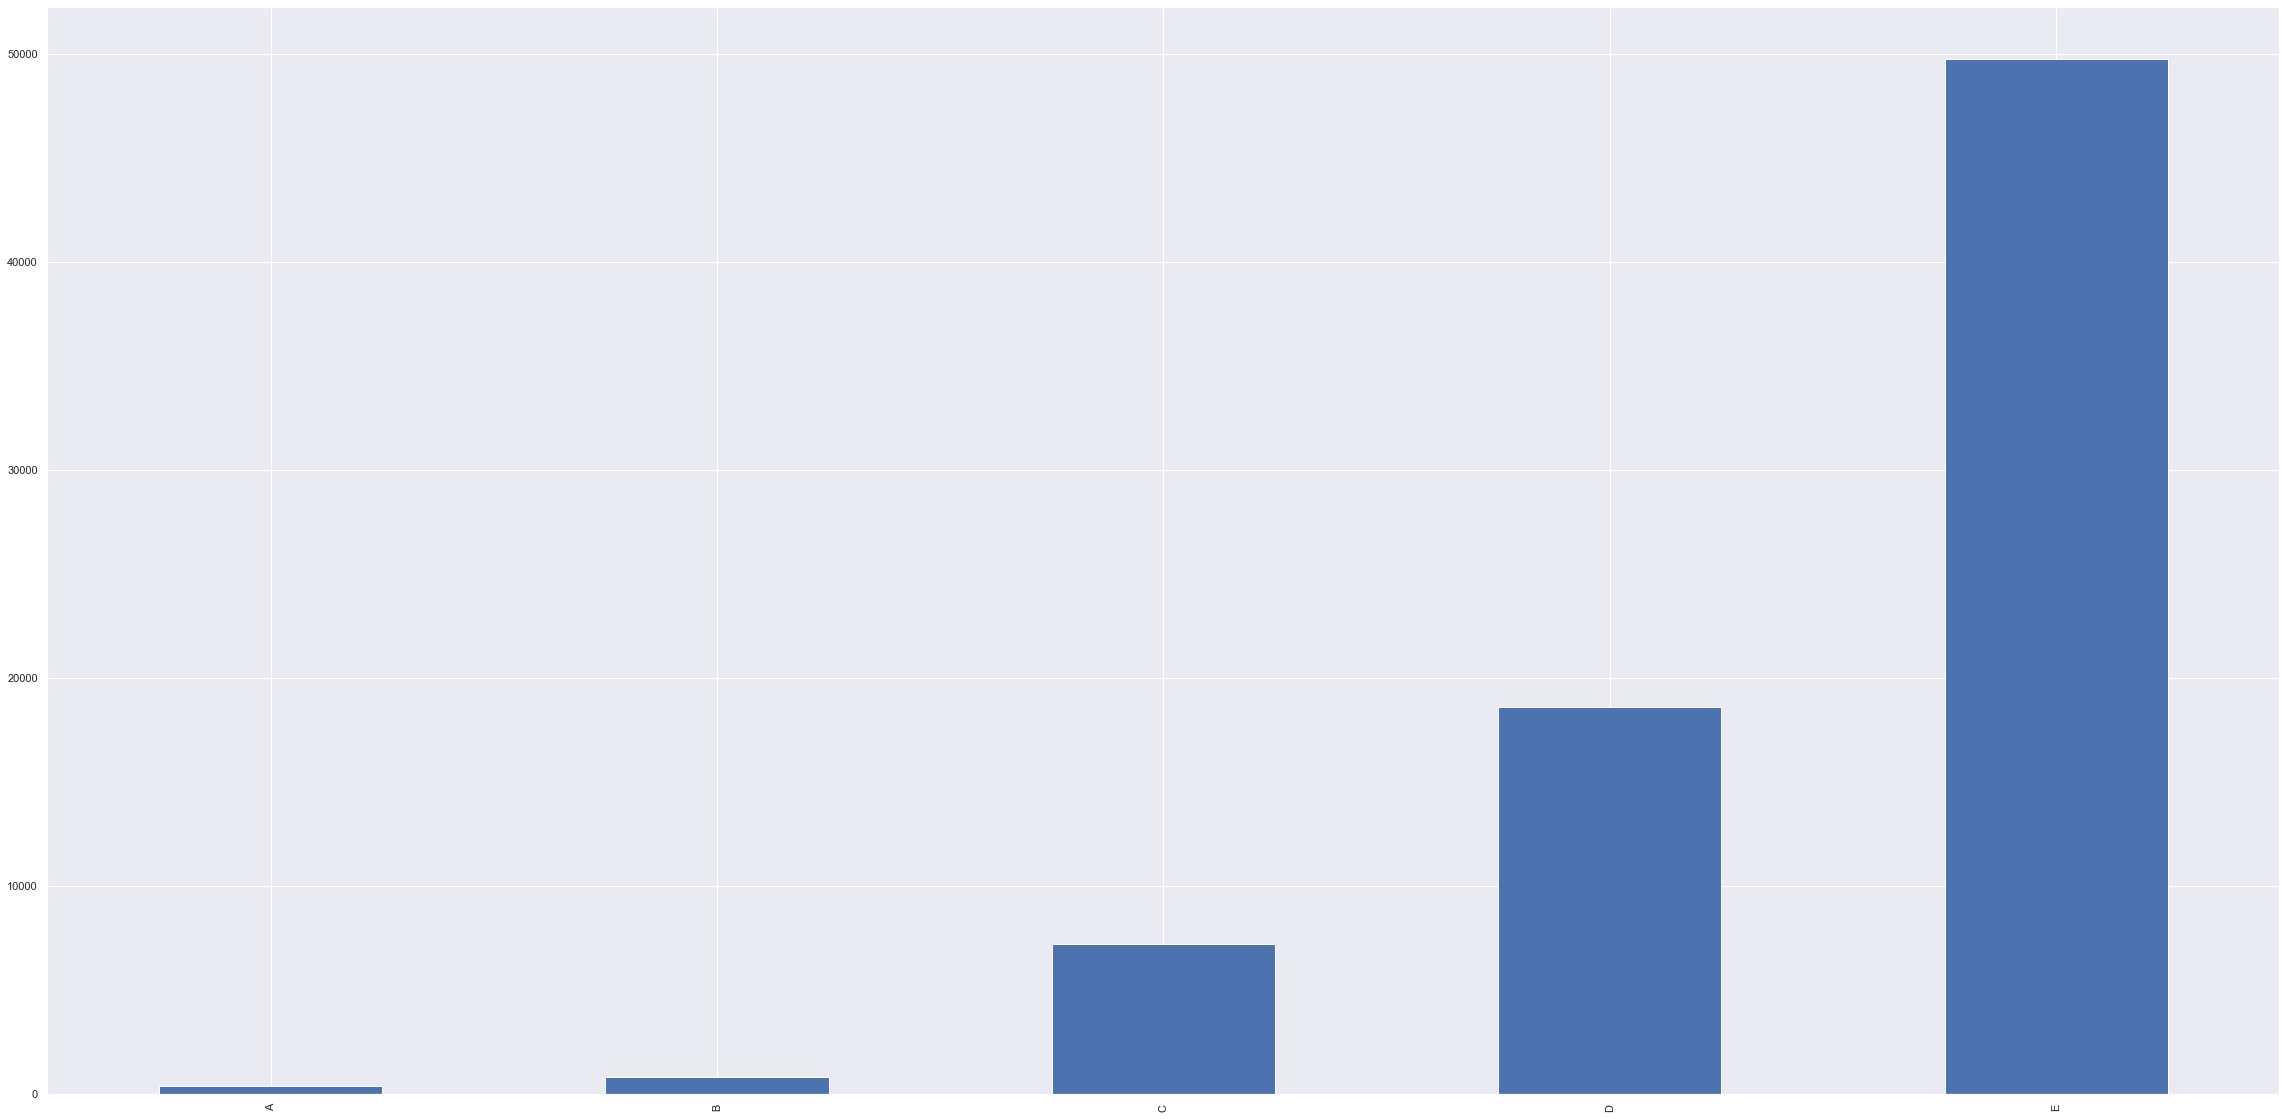

In [41]:
tabela['Renda'].plot(kind = 'bar')

> ### Conclusões

Temos uma imensa maioria de pessoas na classe E(64%), seguido de uma quantia considerável de pessoas na classe D(24%).

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

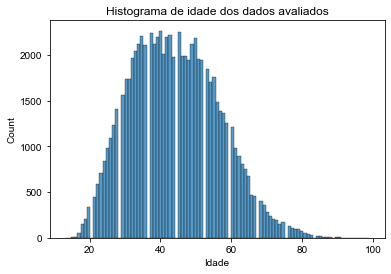

In [10]:
dados.head()
ax = sns.histplot(x=dados['Idade']).set_title('Histograma de idade dos dados avaliados')
sns.set(rc={'figure.figsize':(30,10)})

C:\Users\flavi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


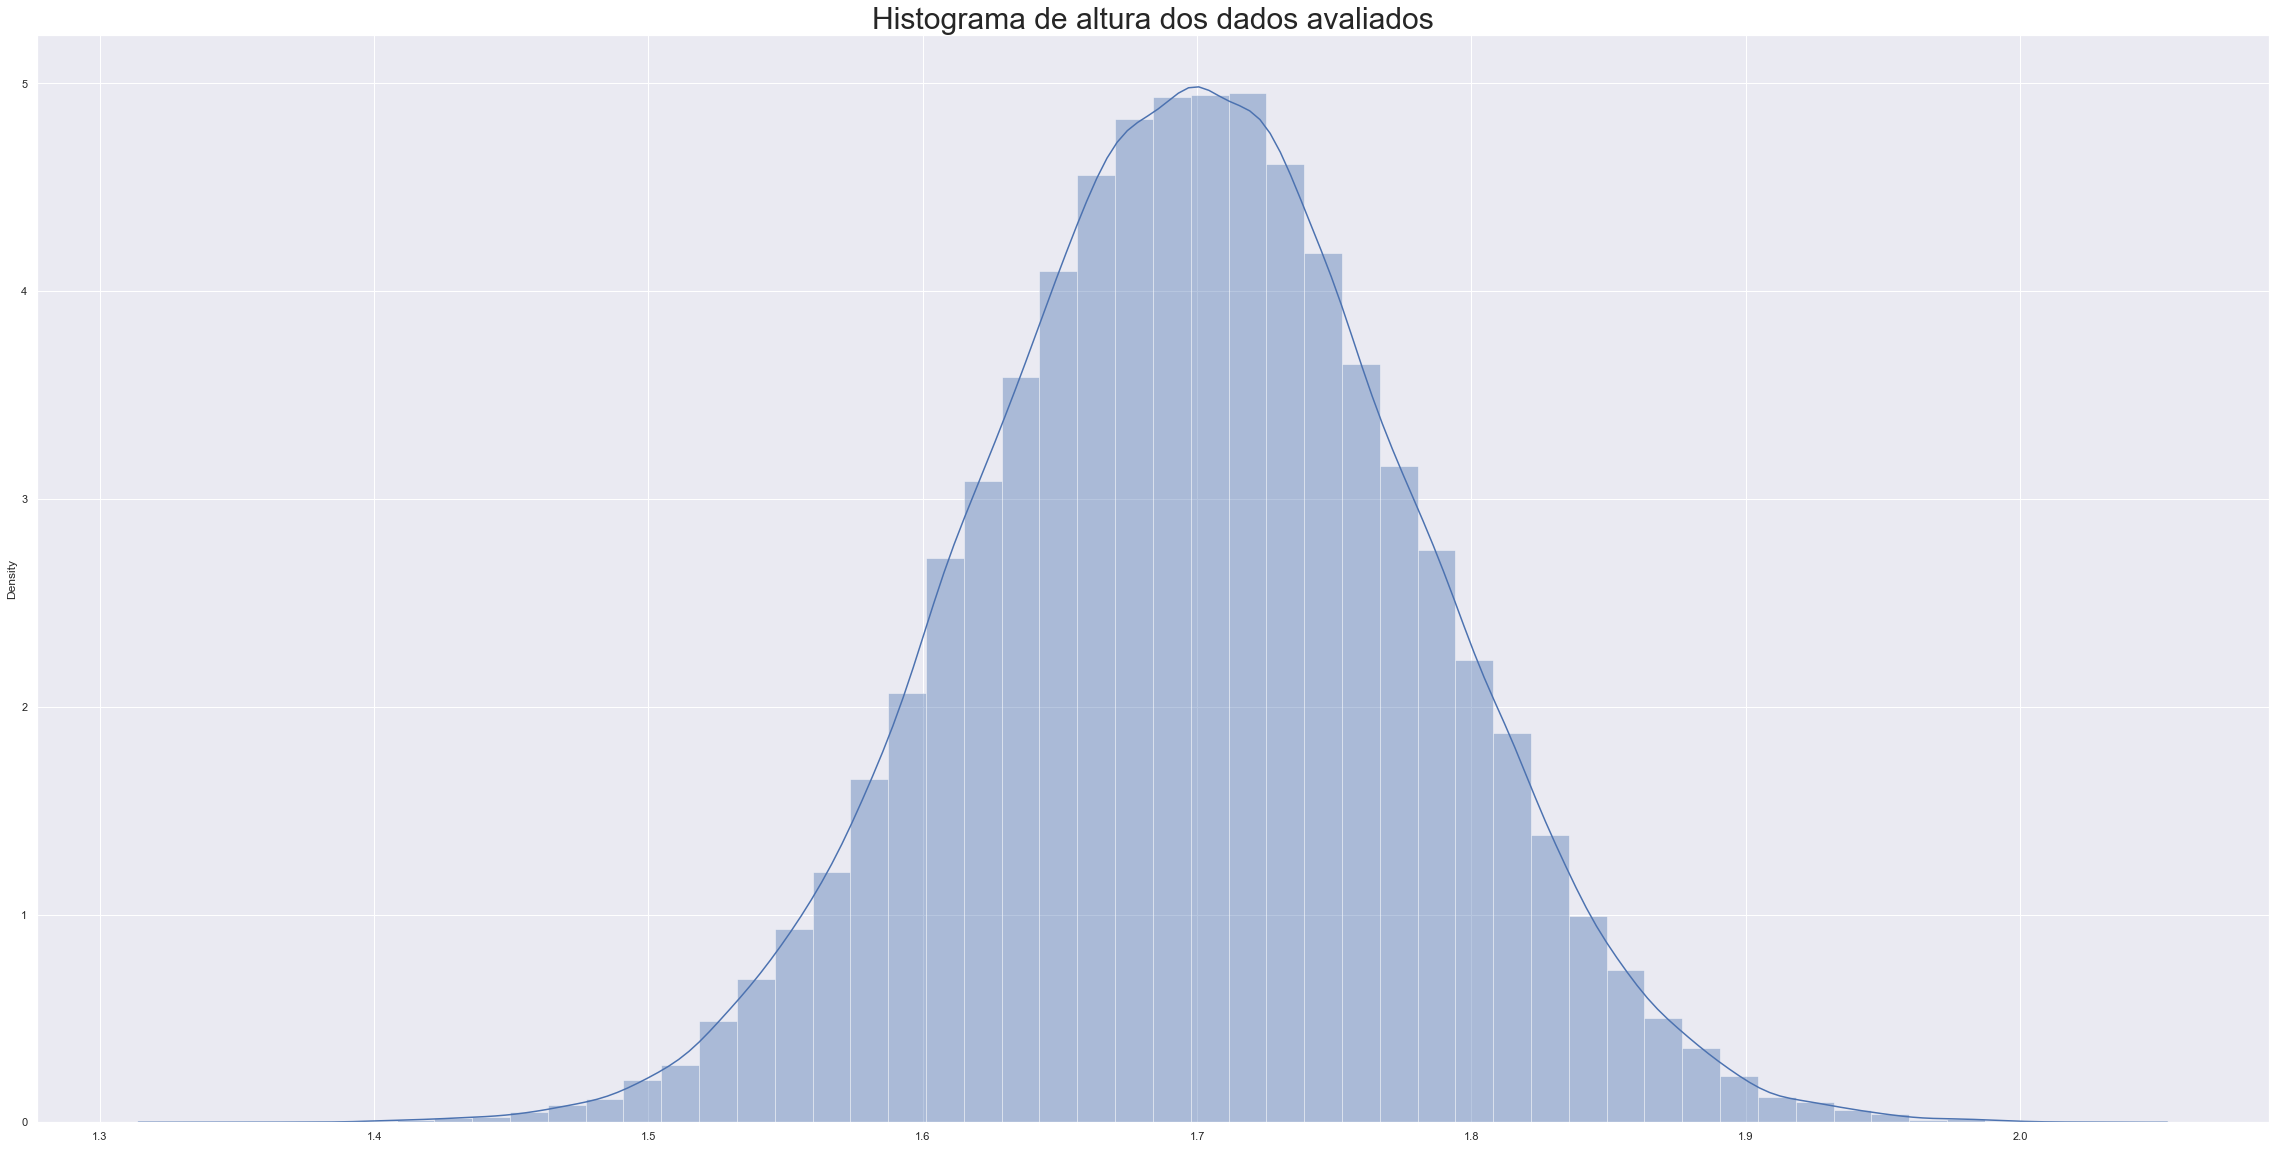

In [42]:
ax = sns.distplot(x=dados['Altura']).set_title('Histograma de altura dos dados avaliados',fontsize = 30)

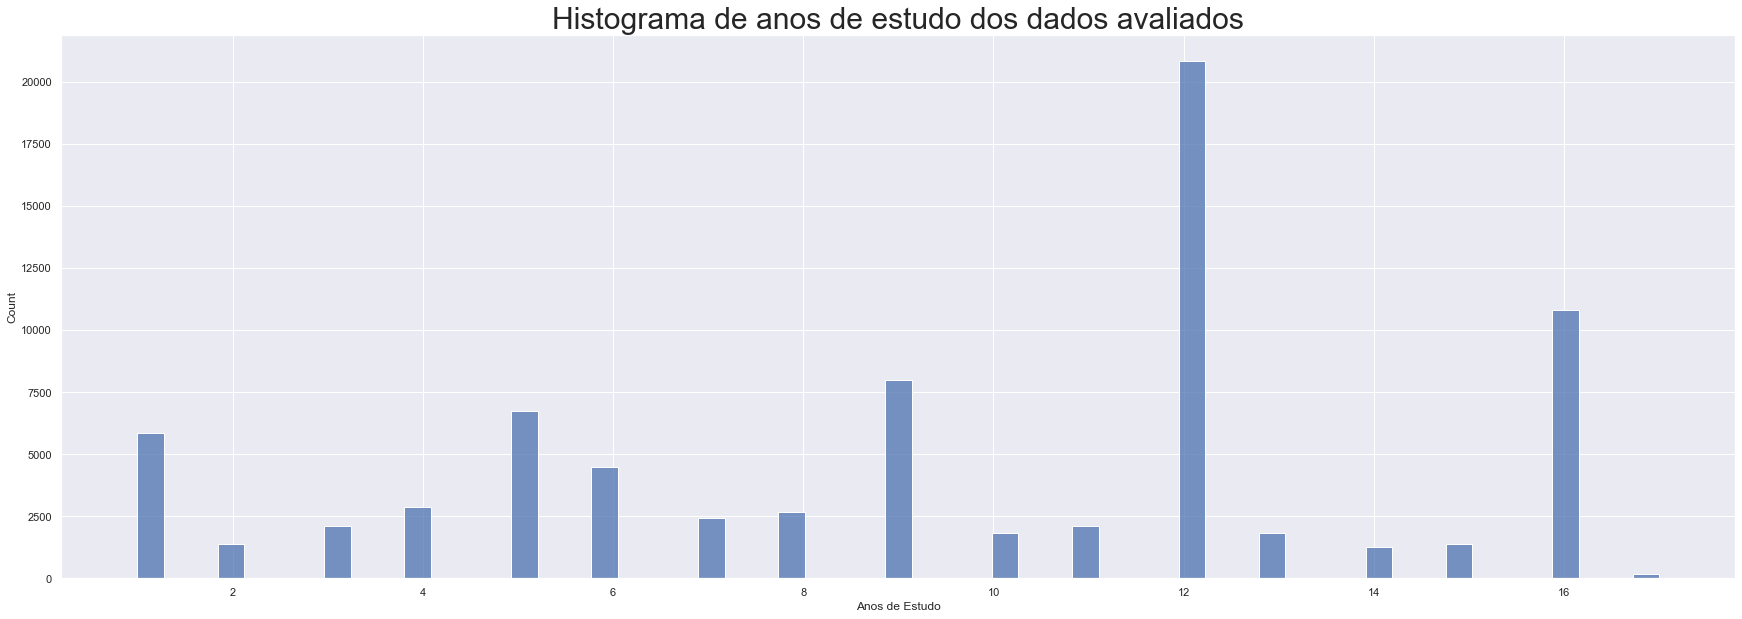

In [12]:
ax = sns.histplot(x=dados['Anos de Estudo']).set_title('Histograma de anos de estudo dos dados avaliados',fontsize = 30)

> ### Conclusões

Escreva suas conclusões aqui...

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

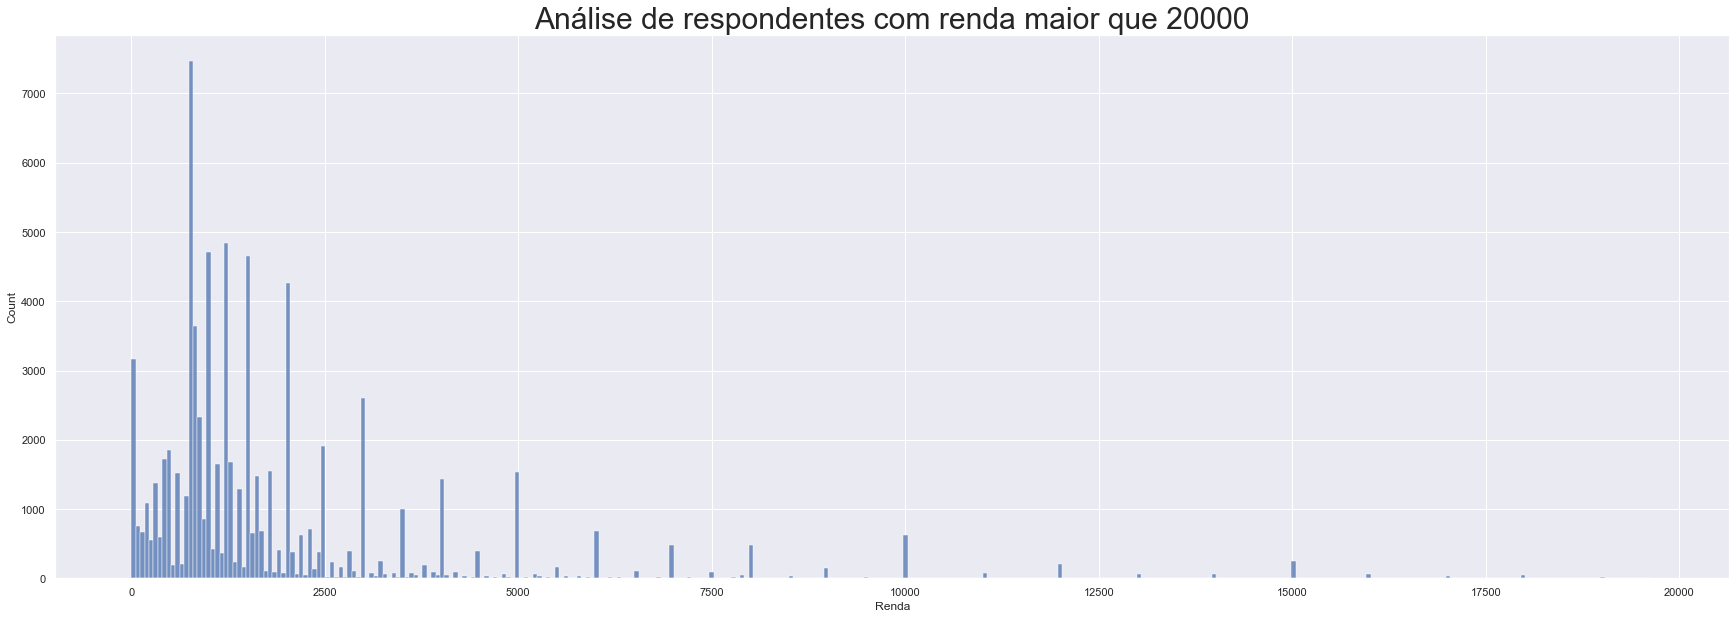

In [13]:
sns.histplot(x=dados.query('Renda < 20000').Renda).set_title('Análise de respondentes com renda maior que 20000',fontsize = 30)
sns.set(rc={'figure.figsize':(40,20)})

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [14]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}

In [43]:
result = pd.crosstab(dados['Sexo'],dados['Cor'])
result.rename(columns = cor,inplace = True)
result.rename(index = sexo,inplace = True)
result

Cor,Indígena,Branca,Preta,Amarela,Parda
Sexo,,,,,
Masculino,256,22194,5502,235,25063
Feminino,101,9621,2889,117,10862


> ### Conclusões

quase 50% da população se considera parda, enquanto 40% se considera branca, com % parecidas entre elas seguimos com 10% de negros e 1% de pessoas amarelas, com prevalecência de homens amarelos
Pelos dados, temos o dobro de homens que mulheres no nosso ds

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [16]:
dados['Renda'].mean()

2000.3831988547631

### Obtenha a mediana

In [17]:
dados['Renda'].median()

1200.0

### Obtenha a moda

In [18]:
dados['Renda'].mode()

0    788
Name: Renda, dtype: int64

### Obtenha o desvio médio absoluto

In [19]:
dados['Renda'].mad()

1526.4951371644931

### Obtenha a variância

In [20]:
dados['Renda'].var()

11044906.00622118

### Obtenha o desvio-padrão

In [21]:
dados['Renda'].std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [22]:
amo_bab = pd.crosstab(dados['Sexo'],dados['Cor'],dados['Renda'],aggfunc = {'mean', 'median', 'max'})
amo_bab.rename(columns = cor,inplace = True)
amo_bab.rename(index = sexo,inplace = True)
amo_bab

max                                        mean               \
Cor       Indígena  Branca  Preta Amarela   Parda     Indígena       Branca   
Sexo                                                                          
Masculino    10000  200000  50000   50000  100000  1081.710938  2925.744435   
Feminino    120000  100000  23000   20000   30000  2464.386139  2109.866750   

                                                   median                  \
Cor              Preta      Amarela        Parda Indígena  Branca   Preta   
Sexo                                                                        
Masculino  1603.861687  4758.251064  1659.577425    797.5  1700.0  1200.0   
Feminino   1134.596400  3027.341880  1176.758516    788.0  1200.0   800.0   

                           
Cor       Amarela   Parda  
Sexo                       
Masculino  2800.0  1200.0  
Feminino   1500.0   800.0

> ### Conclusões

Renda máxima de homens é maior que de mulheres, e a maxima de homens brancos é estupidamente maior que o restante;
A média branca é maior entre homens, mas mulheres indigenas chegam perto, entre mesmo sexo, homens brancos ganham mais.


### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [23]:
amo_bab = pd.crosstab(dados['Sexo'],dados['Cor'],dados['Renda'],aggfunc = {'mad', 'var', 'std'})
amo_bab.rename(columns = cor,inplace = True)
amo_bab.rename(index = sexo,inplace = True)
amo_bab

mad                                                     \
Cor           Indígena       Branca       Preta      Amarela        Parda   
Sexo                                                                        
Masculino   798.910889  2261.012346  975.602482  3709.597211  1125.827704   
Feminino   3007.892952  1670.967106  705.453357  2549.146322   811.580946   

                    std                                                     \
Cor            Indígena       Branca        Preta     Amarela        Parda   
Sexo                                                                         
Masculino   1204.093490  4750.791872  1936.309271  5740.82482  2312.087184   
Feminino   11957.498292  3251.013154  1349.799809  3731.17366  1596.233048   

                    var                                            \
Cor            Indígena        Branca         Preta       Amarela   
Sexo                                                                
Masculino  1.449841e+06  2.257002e+07  3.749294e+06  3.295707e+07   
Feminino   1.429818e+08  1.056909e+07  1.821960e+06  1.392166e+07   

                         
Cor               Parda  
Sexo                     
Masculino  5.345747e+06  
Feminino   2.547960e+06

> ### Conclusões

Escreva suas conclusões aqui...

### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

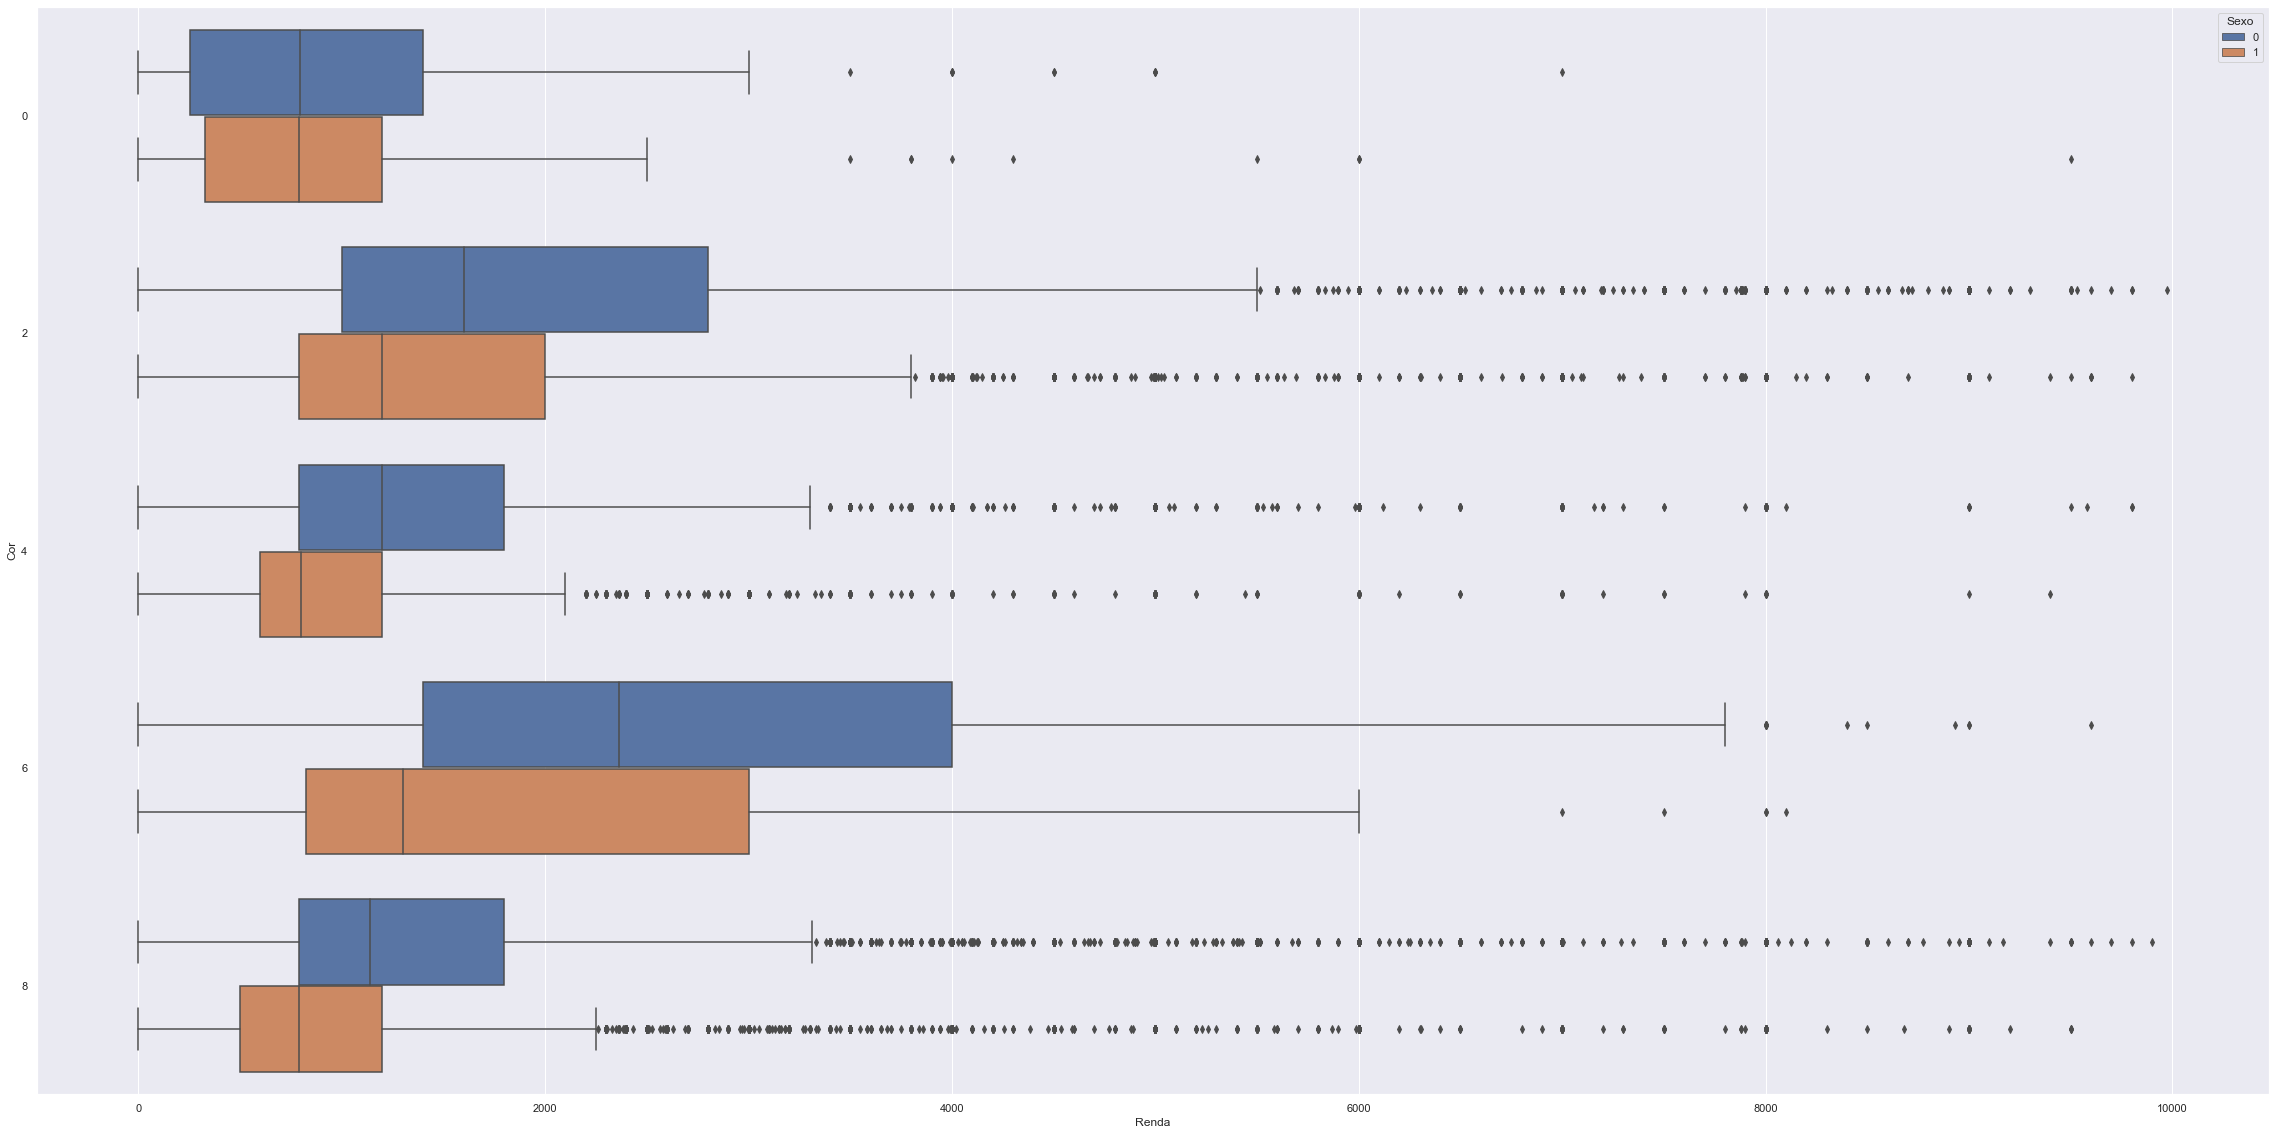

In [24]:
#ax = sns.boxplot(x = dados.query('Renda < 10000').Renda,y= dados.query('Renda < 10000').Cor,hue = dados.query('Renda < 10000').Sexo)
ax = sns.boxplot( x = dados.query('Renda < 10000').Renda, y = 'Cor', hue = 'Sexo',data = dados, orient = 'h')

> ### Conclusões

Escreva suas conclusões aqui...

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [25]:
from scipy import stats
stats.percentileofscore(dados['Renda'],788,kind = 'weak')


28.86777719937533

### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [26]:
lista = []
for x in range (0,100):
    lista.append(x/100)
lista
dados['Renda'].quantile(lista)

0.00        0.0
0.01        0.0
0.02        0.0
0.03        0.0
0.04       50.0
         ...   
0.95     6000.0
0.96     7000.0
0.97     8000.0
0.98    10000.0
0.99    15000.0
Name: Renda, Length: 100, dtype: float64

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [27]:
result = pd.crosstab(dados['Anos de Estudo'],dados['Sexo'],dados['Renda'],aggfunc = {'mean', 'median', 'std'})
result.rename(columns ={0: 'Masculino',1: 'Feminino'},inplace = True)
result.rename(columns = {'mean':'Média','median':'Mediana','std':'DEVPAD'},inplace = True)
result

Média                Mediana                DEVPAD  \
Sexo              Masculino     Feminino Masculino Feminino    Masculino   
Anos de Estudo                                                             
1                799.494638   516.201748     700.0    390.0  1023.904884   
2                895.629047   492.771987     788.0    400.0  1331.950552   
3                931.178986   529.911638     788.0    450.0  1435.173827   
4               1109.203862   546.853916     800.0    500.0  2143.800133   
5               1302.329283   704.279111    1000.0    788.0  1419.821787   
6               1338.653218   781.389776    1045.0    788.0  1484.650587   
7               1448.875419   833.732824    1200.0    788.0  1476.628602   
8               1465.497940   830.751004    1200.0    788.0  1419.708673   
9               1639.396667   933.615351    1300.0    800.0  1515.583715   
10              1508.038850   868.021700    1200.0    788.0  2137.664774   
11              1731.270847   925.919225    1218.0    800.0  2078.609734   
12              2117.060504  1286.790889    1500.0   1000.0  2676.538942   
13              2470.330776  1682.313725    1800.0   1200.0  2268.081538   
14              3195.099154  1911.730047    2400.0   1300.0  2797.116800   
15              3706.620269  2226.460457    2500.0   1600.0  3987.214974   
16              6134.279790  3899.513231    4000.0   2800.0  7447.613594   
17              1295.761905   798.174419    1200.0    788.0   979.648745   

                             
Sexo               Feminino  
Anos de Estudo               
1                639.311534  
2                425.291842  
3                498.234168  
4                424.124446  
5                629.553397  
6                635.782641  
7                574.547028  
8                602.038029  
9                896.781213  
10               973.221652  
11               620.611907  
12              1819.040417  
13              4851.833513  
14              2053.789771  
15              2064.083336  
16              4212.770709  
17               459.985964

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

In [28]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


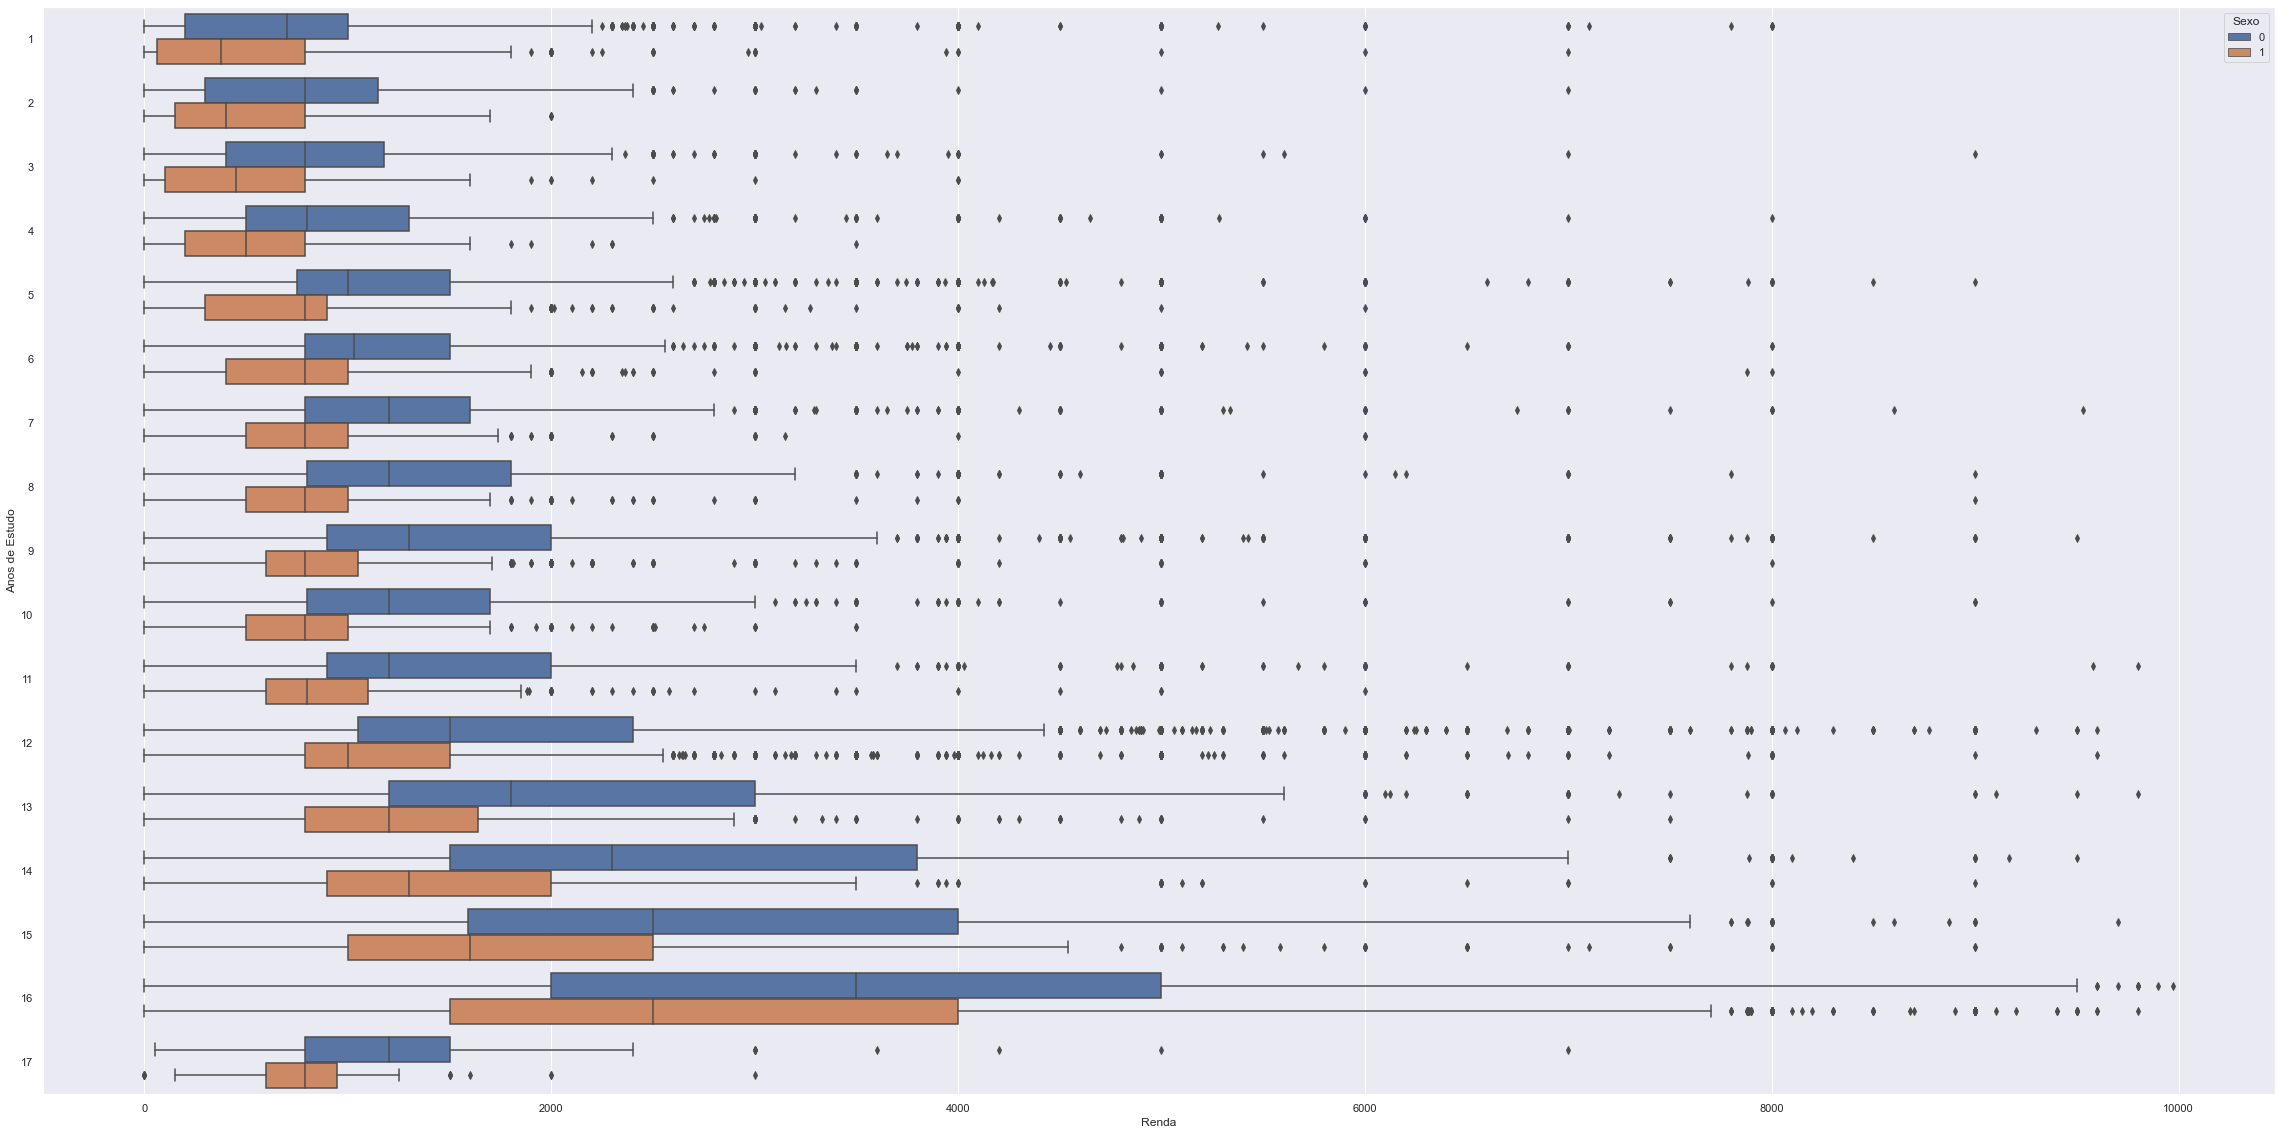

In [29]:
ax = sns.boxplot( x = dados.query('Renda < 10000').Renda, y = 'Anos de Estudo', hue = 'Sexo',data = dados, orient = 'h')

> ### Conclusões

Escreva suas conclusões aqui...

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [30]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [31]:
dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})

Renda                             
           mean  median     max          std
UF                                          
11  1789.761223  1200.0   50000  2406.161161
12  1506.091782   900.0   30000  2276.233415
13  1445.130100   900.0   22000  1757.935591
14  1783.588889  1000.0   20000  2079.659238
15  1399.076871   850.0   50000  2053.779555
16  1861.353516  1200.0   15580  2020.688632
17  1771.094946  1000.0   60000  2934.590741
21  1019.432009   700.0   30000  1887.816905
22  1074.550784   750.0   40000  2373.355726
23  1255.403692   789.0   25000  1821.963536
24  1344.721480   800.0   15500  1651.805500
25  1293.370487   788.0   30000  1950.272431
26  1527.079319   900.0   50000  2389.622497
27  1144.552602   788.0   11000  1237.856197
28  1109.111111   788.0   16000  1478.997878
29  1429.645094   800.0  200000  3507.917248
31  2056.432084  1200.0  100000  3584.721547
32  2026.383852  1274.0  100000  3513.846868
33  2496.403168  1400.0  200000  5214.583518
35  2638.104986  1600.0   80000  3503.777366
41  2493.870753  1500.0  200000  4302.937995
42  2470.854945  1800.0   80000  3137.651112
43  2315.158336  1500.0   35000  2913.335783
50  2262.604167  1500.0   42000  3031.419122
51  2130.652778  1500.0   35000  2542.630178
52  1994.580794  1500.0   30000  2221.933065
53  4241.954722  2000.0  100000  5550.463338

### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:xlabel='Renda', ylabel='UF'>

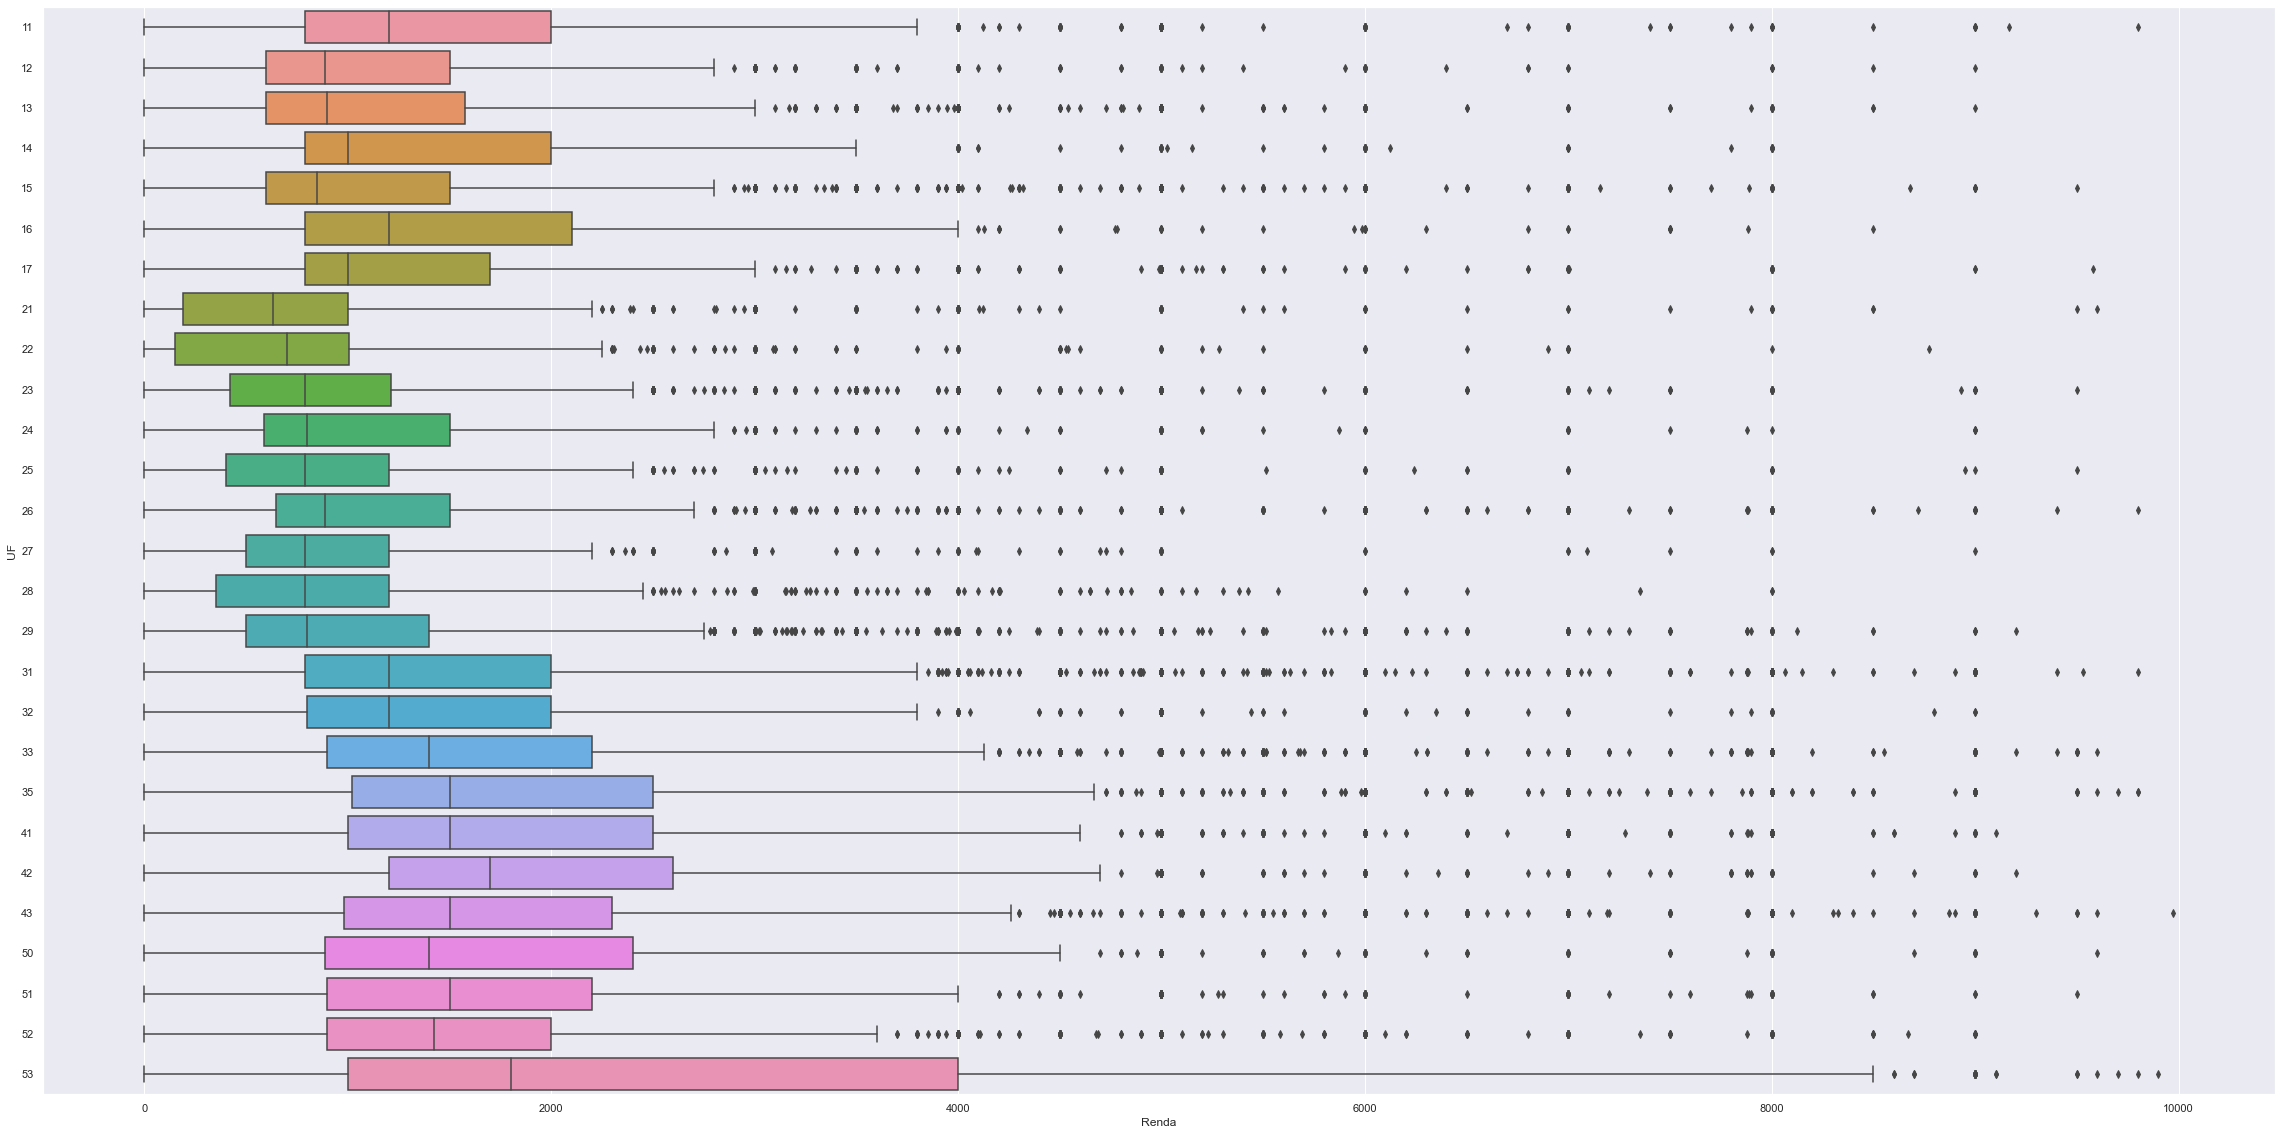

In [33]:
ax = sns.boxplot(x=dados.query('Renda < 10000').Renda, y=dados.query('Renda < 10000').UF,data=dados, orient = 'h')
ax

In [40]:
len(dados['UF'].unique())

27

> ### Conclusões

Escreva suas conclusões aqui...